In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from matplotlib.colors import ListedColormap

colors = {
    'main': '#CFD923',
    'second': '#EB5D18',
    'extra': '#E0E0E0'
}

brunoyam_cmap = ListedColormap([colors['main'], colors['second'], colors['extra']])

plt.rcParams.update({'font.family':'Closer'})
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

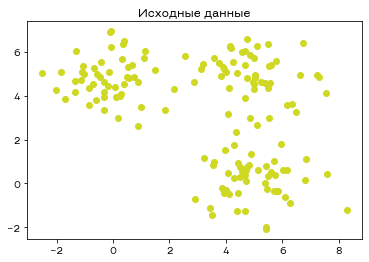

In [4]:
cluster_size = 50
n_clusters = 3
X = np.zeros((cluster_size * n_clusters, 2))

centers = [(5, 5), (5, 0), (0, 5)]

for iter_n, (x_center, y_center) in enumerate(centers):
    x = np.random.normal(x_center, 1, size=cluster_size)
    y = np.random.normal(y_center, 1, size=cluster_size)
    
    X[(iter_n) * cluster_size: (iter_n + 1) * cluster_size, 0] = x
    X[(iter_n) * cluster_size: (iter_n + 1) * cluster_size, 1] = y
    
    plt.scatter(x, y, c=colors['main'])
plt.title('Исходные данные')
plt.savefig('../images/kmeans1.jpg')

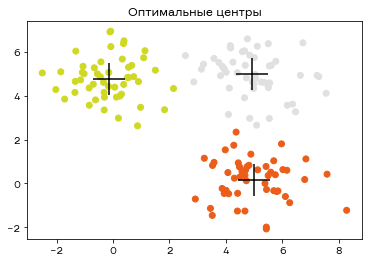

In [5]:
from sklearn.cluster import KMeans

model = KMeans(3)
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=brunoyam_cmap)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black', marker='+', s=1000)
plt.title('Оптимальные центры')
plt.savefig('../images/kmeans2.jpg')

In [14]:
np.random.seed(2)
random_centers_x = np.random.normal(loc=X[:, 0].mean(), scale=X[:, 0].std(), size=3)
random_centers_y = np.random.normal(loc=X[:, 1].mean(), scale=X[:, 1].std(), size=3)
random_centers = np.vstack((random_centers_x, random_centers_y)).T

def get_labels(X, centers):
    labels = np.zeros(X.shape[0])
    for i, point in enumerate(X):
        distances = []
        for center in centers:
            distances.append(np.linalg.norm(point - center))
        cluster_number = np.array(distances).argmin()
        labels[i] = cluster_number
    return labels


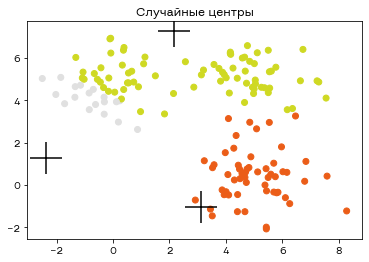

In [15]:
labels = get_labels(X, random_centers)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=brunoyam_cmap)
plt.scatter(random_centers[:, 0], random_centers[:, 1], c='black', marker='+', s=1000)

plt.title('Случайные центры')
plt.savefig('../images/kmeans3.jpg')

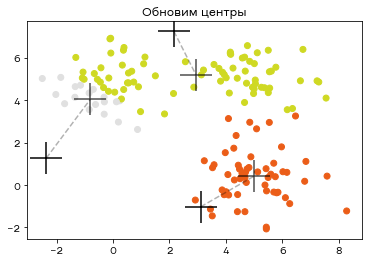

In [16]:
df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = labels
new_centers = df.groupby('label').mean().values

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=brunoyam_cmap)
plt.scatter(random_centers[:, 0], random_centers[:, 1], c='black', marker='+', s=1000)
plt.scatter(new_centers[:, 0], new_centers[:, 1], c='black', marker='+', s=1000, alpha=0.7)

for old_center, new_center in zip(random_centers, new_centers):
    x1, y1 = old_center
    x2, y2 = new_center
    plt.plot([x1, x2], [y1, y2], color='black', alpha=0.3, linestyle='--')

plt.title('Обновим центры')
plt.savefig('../images/kmeans4.jpg')

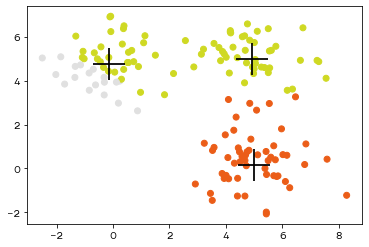

In [43]:
frames = []
cur_centers = random_centers
old_label = np.zeros(X.shape[0])
new_label = np.ones(X.shape[0])
fig,ax = plt.subplots()
while True:
    new_label = get_labels(X, cur_centers)
    df = pd.DataFrame(X, columns=['x', 'y'])
    df['label'] = new_label
    new_centers = df.groupby('label').mean().values
    ax.clear()
    scatters = []
    lines = []
    ax.scatter(X[:, 0], X[:, 1], c=labels, cmap=brunoyam_cmap)
    ax.scatter(cur_centers[:, 0], cur_centers[:, 1], c='black', marker='+', s=1000)
    ax.scatter(new_centers[:, 0], new_centers[:, 1], c='black', marker='+', s=1000, alpha=0.7)
    for old_center, new_center in zip(cur_centers, new_centers):
        x1, y1 = old_center
        x2, y2 = new_center
        line = ax.plot([x1, x2], [y1, y2], color='black', alpha=0.3, linestyle='--')
        lines.append(line[0])
    frames.append([])
    frames[-1] += scatters
    frames[-1] += lines
    old_label = new_label
    # new_label = get_labels(X, cur_centers)

    if (cur_centers == new_centers).all():
        break

    cur_centers = new_centers

In [54]:
def get_data():
    cur_centers = random_centers
    old_label = np.zeros(X.shape[0])
    new_label = np.ones(X.shape[0])
    while True:
        new_label = get_labels(X, cur_centers)
        df = pd.DataFrame(X, columns=['x', 'y'])
        df['label'] = new_label
        new_centers = df.groupby('label').mean().values
        yield X, old_label, new_label, cur_centers, new_centers
        if (cur_centers == new_centers).all():
            break

        cur_centers = new_centers

In [199]:
def plot_data(X, old_label, new_label, cur_centers, new_centers):
    global ax
    scatters = []
    lines = []
    ax.clear()
    scatters.append(ax.scatter(X[:, 0], X[:, 1], c=labels, cmap=brunoyam_cmap))
    scatters.append(ax.scatter(cur_centers[:, 0], cur_centers[:, 1], c='black', marker='+', s=1000))
    scatters.append(ax.scatter(new_centers[:, 0], new_centers[:, 1], c='black', marker='+', s=1000, alpha=0.7))
    for old_center, new_center in zip(cur_centers, new_centers):
        x1, y1 = old_center
        x2, y2 = new_center
        line = ax.plot([x1, x2], [y1, y2], color='black', alpha=0.3, linestyle='--')
        lines.append(line[0])
    return *scatters, *lines

In [226]:
def update(i):
    global ax
    data = get_data()
    for _ in range(i + 1):
        d = next(data)
    plotted = plot_data(*d)
    return plotted

ani = FuncAnimation(fig, update, blit=True, repeat=True, frames=6)
ani.save("../images/kmeans.gif", dpi=300, writer=PillowWriter(fps=1))

C:\Users\koval\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


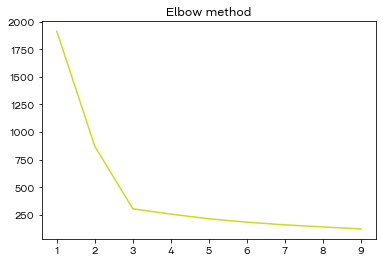

In [230]:
def distance_by_n(x, n):
    model = KMeans(n_clusters=n)
    model.fit(x)
    return model.inertia_

distances = [distance_by_n(X, k) for k in range(1, 10)]
plt.plot(range(1, 10), distances, color=colors['main'])
plt.title('Elbow method')
plt.savefig('../images/elbow.jpg')

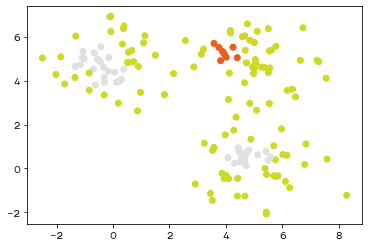

In [240]:
from sklearn.cluster import DBSCAN

model = DBSCAN(min_samples=7)
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=brunoyam_cmap)

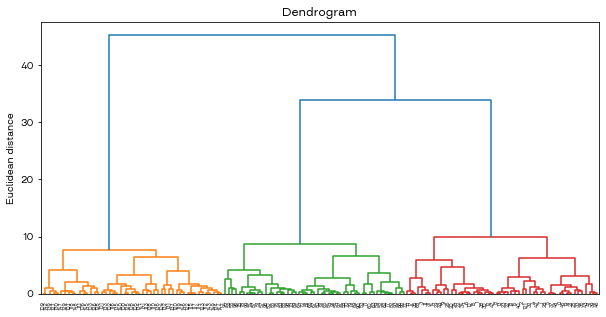

In [246]:
from scipy.cluster.hierarchy import dendrogram , linkage
Z = linkage(X, method = 'ward')

plt.figure(figsize=(10, 5))
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.savefig('../images/dendrogram.jpg')